In [1]:
import pandas as pd
import csv 
import datetime as dt
import matplotlib.pyplot as plt

order_file = "all_waybill_info_meituan.csv"
order_df = pd.read_csv(order_file)
order_df[['dt']] = order_df[['dt']].astype(str) 
order_df['dt'] =  pd.to_datetime(order_df['dt'])

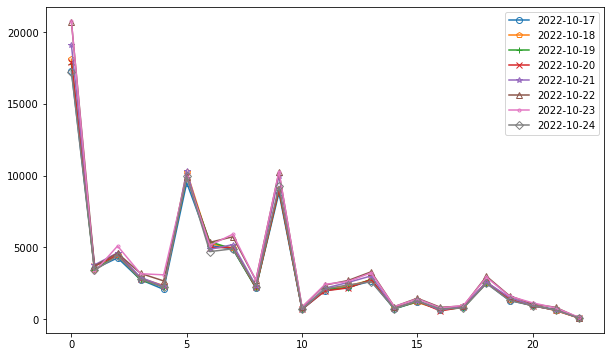

In [54]:
groups = ['dt', 'da_id']
order_group = order_df.groupby(by=groups)
order_count_by_dt = order_group['order_id'].count()
order_count_by_dt = order_count_by_dt.to_frame(name='count')

markers = (m for m in ['o', 'p', '+', 'x', '*', '^', '.', 'D']) 

fig = plt.figure()
fig.set_size_inches(10, 6)
for d, grp in order_count_by_dt.groupby('dt'):
    grp = grp.reset_index(drop=False)
    # if label.date() == dt.date.fromisoformat('2022-10-17'):
    plt.plot(grp['da_id'], grp['count'], marker=next(markers),   markerfacecolor='none', label=d.date())
    # grp['count'].plot(style='--o',xticks=grp['da_id'],label=d.date())

plt.legend()
plt.show()

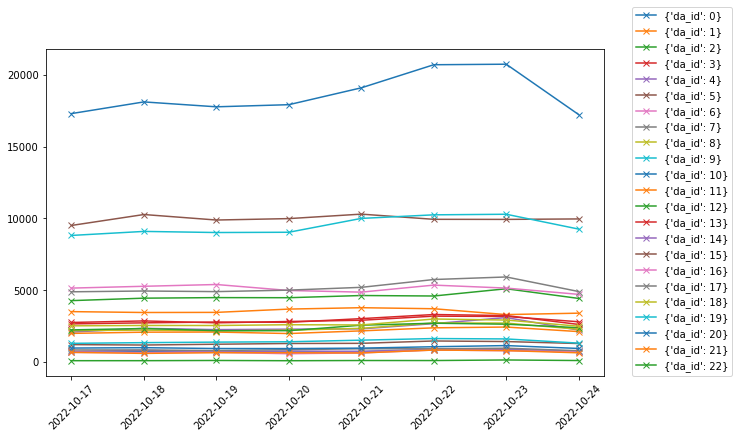

In [188]:
groups = ['da_id', 'dt']
order_group = order_df.groupby(by=groups)
order_count_by_da = order_group['order_id'].count()
order_count_by_da = order_count_by_da.to_frame(name='count')

fig = plt.figure()
fig.set_size_inches(10, 6)
for d, grp in order_count_by_da.groupby('da_id'):
    grp = grp.reset_index(drop=False)
    plt.plot(grp['dt'], grp['count'], marker='x',  markerfacecolor='none', label={"da_id": d})
    # grp['count'].plot(style='--o',xticks=grp['da_id'],label=d.date())

plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=0)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


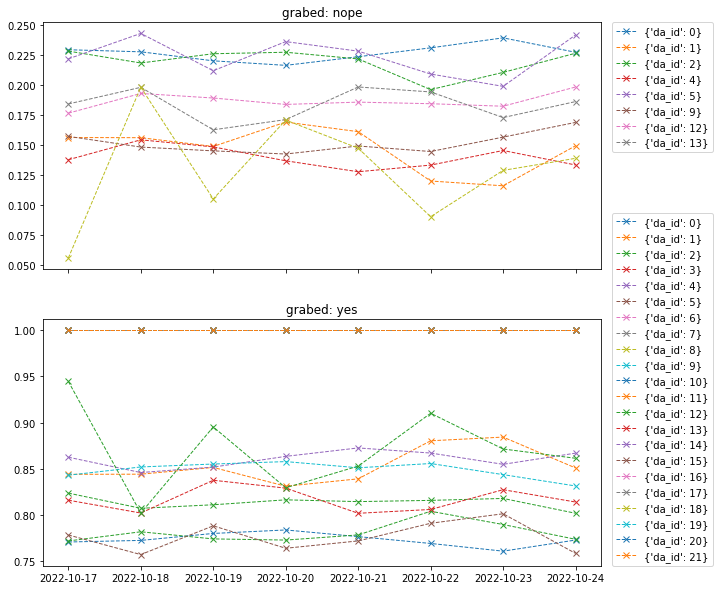

In [195]:
groups = ['da_id', 'dt', 'is_courier_grabbed']
order_group = order_df.groupby(by=groups)
order_count_by_grab = order_group['order_id'].count()
order_count_by_grab = order_count_by_grab.to_frame(name='count')

new_df = pd.DataFrame()
for d, grp in order_count_by_grab.groupby(['da_id', 'dt']):
    grp = grp.reset_index(drop=False)
    grp['ratio'] = grp['count'] / grp['count'].sum()
    if new_df.empty:
        new_df = grp
    else:
        new_df = pd.concat([new_df, grp],ignore_index=True)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.set_size_inches(10, 10)
for d, grp in new_df.groupby(['is_courier_grabbed', 'da_id']):
    if d[0] == 0:
        ax1.legend(bbox_to_anchor=(1.2, 1.0), loc='upper right', borderaxespad=0)
        ax1.title.set_text("grabed: nope")
        ax1.plot(grp['dt'], grp['ratio'], marker='x', linestyle='dashed', linewidth=1, markerfacecolor='none', label={'da_id':d[-1]})
    else:
        ax2.set_xticks(grp['dt'])
        ax2.legend(bbox_to_anchor=(1.2, 0), loc='lower right', borderaxespad=0)
        ax2.title.set_text("grabed: yes")
        ax2.plot(grp['dt'], grp['ratio'], marker='x', linestyle='dashed', linewidth=1, markerfacecolor='none', label={'da_id':d[-1]})

plt.show()

In [28]:
# 每一个时间段 需要被分单的订单数据 15921-lines
dispatch_order_file = "dispatch_waybill_meituan.csv"
dispatch_order_df = pd.read_csv(dispatch_order_file)
dispatch_order_df[['dt']] = dispatch_order_df[['dt']].astype(str) 
dispatch_order_df['dt'] =  pd.to_datetime(dispatch_order_df['dt'])
groups = ['dt', 'dispatch_time']
dispatch_order_group = dispatch_order_df.groupby(by=groups)

# 每一个时间段 可以使用的骑手及背单信息 62044-lines
dispatch_rider_file = "dispatch_rider_meituan.csv"
dispatch_rider_df = pd.read_csv(dispatch_rider_file)
dispatch_rider_df[['dt']] = dispatch_rider_df[['dt']].astype(str) 
dispatch_rider_df['dt'] =  pd.to_datetime(dispatch_rider_df['dt'])
dispatch_rider_group = dispatch_rider_df.groupby(by=groups)
import json
for k, v in dispatch_order_group:
    print(k, dt.datetime.fromtimestamp(k[-1]))
    print(v['order_id'].values)
    rider_info = dispatch_rider_group.get_group(k)
    rider_info_dict = {}
    order_in_rider = set()
    for rowname,row in rider_info.iterrows():
        rider_id = row['courier_id']
        if rider_info_dict.__contains__(rider_id):
            raise KeyError("Duplicated rider-id {}: {}".format(rider_id, dt.datetime.fromtimestamp(k[-1])))
        order_list = json.loads(row["courier_waybills"])
        rider_info_dict[row['courier_id']] = {
            'id':row['courier_id'],
            'rider_lat':row['rider_lat'],
            'rider_lng':row['rider_lng'],
            'courier_waybills': order_list
            }
        order_in_rider.update(order_list)
    print(order_in_rider)
    break
    


(Timestamp('2022-10-17 00:00:00'), 1665977114) 2022-10-17 11:25:14
[522093 259146  64002  85993 215713   3214 395445 321260 293224  12964
 432901 307304 140944 134860 329449 147009 250552  25815 558419 180222
 365592   3218 183218 230204 110597 128718  76554 113670 304465 206680
 540428   6485 177189  98378 296029  73398 406339 387333 318433  25840
 334972 159024 483066 273389 454279 159039 496025 532606  51479 287655
 373801 116621  12973     89  22582 480559     88 162151 357227 392759
 267686 253371 165207 376533 550663 110606 480562 137869 174195 177190
 168121 140945 537895 384548 165208 472659 477934 403629 435627 440996
 159019 422236 390033 334973 449043 153048  89106 174193 209744 273387
  45035 456864 454280  89135 516904 177195 313018 279195 156047 215710
 519413 174196 282034 451738  16099 236055 122659 472664 247693 293214
 542950 230205 376539 125700 236060 524710 186096 194870 293213   3219
 348811 379180  19402 424980 233013 200772 224396 490851 490826 224392
 168124   